In [1]:
import tensorflow as tf
import lime
from lime import lime_image
import matplotlib.pyplot as plt
from skimage.segmentation import mark_boundaries
from configs import paths, dataset_gen
import numpy as np


In [2]:
# Load the model
model = tf.keras.models.load_model(paths.model)

In [3]:
x, y = dataset_gen(paths, type='test', return_xy=True)

Found 624 images belonging to 2 classes.


In [9]:
x1.shape

(1, 150, 150, 3)

In [8]:
x1=np.expand_dims(x[0], axis=0)

In [36]:
def explain_instance(x, y, model, index):

    explainer = lime_image.LimeImageExplainer()
    # x, y = dataset_gen(paths, type='test', return_xy=True)
    x1=np.expand_dims(x[index], axis=0)
    y_pred_prob = model.predict(x1)
    y_pred = [0 if x<0.5 else 1 for x in y_pred_prob]
    # test_generator = dataset_gen(paths, type='test')

    # print('Image path-',test_generator.filenames[index])
    print('Actual label-', y[index])
    print('Predicted label', y_pred)
    print('Predicted label prob', y_pred_prob)

    exp = explainer.explain_instance(x[index], 
                                    model.predict,  
                                    hide_color=0, 
                                    num_samples=1500)

    image, mask = exp.get_image_and_mask(exp.top_labels[0], 
                                            positive_only=True, 
                                            num_features=6, 
                                            hide_rest=False,
                                            min_weight=0.1
                                            )
    print('The original image is as follows-')
    plt.imshow(exp.image)
    plt.show()
    print('The segments identified are as follows')
    plt.imshow(exp.segments)
    plt.show()
    print('the major segment(s) is/are as follows' )
    plt.imshow(mark_boundaries(image, mask))
    plt.axis('off')
    plt.show()



1/1 [==============================] - 0s 26ms/step
Actual label- 0.0
Predicted label [0]
Predicted label prob [[0.00767457]]


  0%|          | 0/1500 [00:00<?, ?it/s]

1/1 [==============================] - 0s 49ms/step
The original image is as follows-


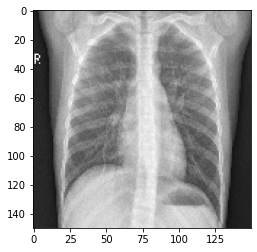

The segments identified are as follows


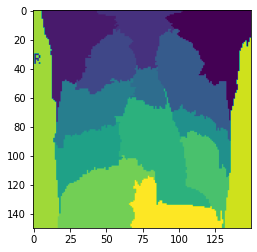

the major segment(s) is/are as follows


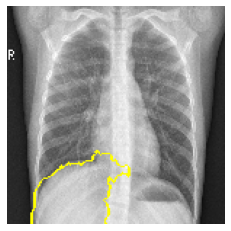

In [37]:
explain_instance(x, y, model, 1)

In [4]:
x, y = dataset_gen(paths, type='train', return_xy=True)

Found 5216 images belonging to 2 classes.


In [ ]:
explainer = lime_image.LimeImageExplainer()
for index in range(0,x.shape[0]):
    exp = explainer.explain_instance(x[index], 
                                    model.predict,  
                                    hide_color=0, 
                                    num_samples=100)
    #Select the same class explained on the figures above.
    ind =  exp.top_labels[0]

    #Map each explanation weight to the corresponding superpixel
    dict_heatmap = dict(exp.local_exp[ind])
    heatmap = np.vectorize(dict_heatmap.get)(exp.segments) 

    #Plot. The visualization makes more sense if a symmetrical colorbar is used.
    plt.imshow(heatmap, cmap = 'RdBu', vmin  = -heatmap.max(), vmax = heatmap.max())
    # plt.colorbar()
    plt.axis('off')

    if y[index]==1:
        plt.savefig(r'C:\Users\anant\Desktop\Research\Code\processed_data_test\processed_pneumonia\png'+str(index))
    else:
        plt.savefig(r'C:\Users\anant\Desktop\Research\Code\processed_data_test\processed_normal\png'+str(index))

In [43]:
exp.local_exp

{0: [(4, -0.2004702836798321),
  (10, -0.19408144718496617),
  (3, -0.1274961056494474),
  (18, 0.11948388207272433),
  (19, -0.11165815664820343),
  (12, -0.10443539569587552),
  (17, 0.1013850534549997),
  (11, -0.09076287697586392),
  (14, -0.08887730386622864),
  (2, -0.07398256773048947),
  (13, -0.046360194391230514),
  (15, 0.04463990853659107),
  (0, 0.03803023336420633),
  (8, 0.032491376939765705),
  (6, -0.03195792937186438),
  (5, 0.02950434331991923),
  (22, 0.02384470960863965),
  (21, 0.021060735995421524),
  (9, 0.011608995195024023),
  (1, 0.00827181262948452),
  (16, 0.0060557308990690905),
  (20, 0.005001695840668158),
  (7, -0.0032667869336938725)]}

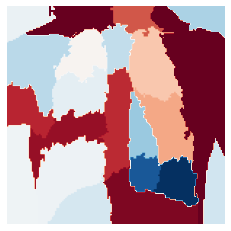

In [42]:
#Select the same class explained on the figures above.
ind =  exp.top_labels[0]

#Map each explanation weight to the corresponding superpixel
dict_heatmap = dict(exp.local_exp[ind])
heatmap = np.vectorize(dict_heatmap.get)(exp.segments) 

#Plot. The visualization makes more sense if a symmetrical colorbar is used.
plt.imshow(heatmap, cmap = 'RdBu', vmin  = -heatmap.max(), vmax = heatmap.max())
# plt.colorbar()
plt.axis('off')
plt.savefig('png')
# plt.imsave( arr=heatmap)

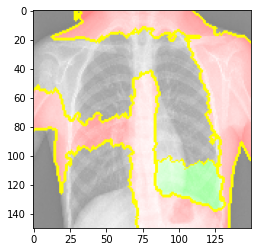

In [14]:
temp, mask = exp.get_image_and_mask(exp.top_labels[0], positive_only=False, num_features=10, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))